In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("data.csv")
data = data.drop(['id'], axis=1)



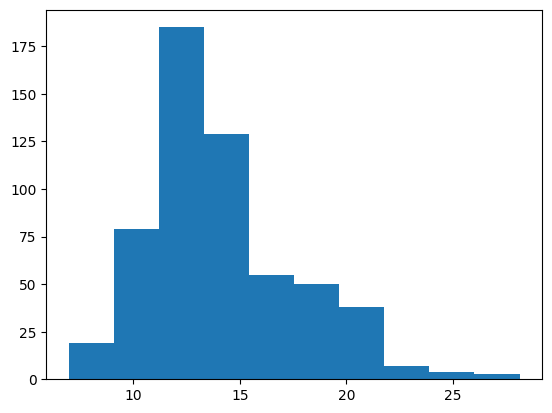

In [ ]:
plt.hist(data["radius_mean"])
plt.show()

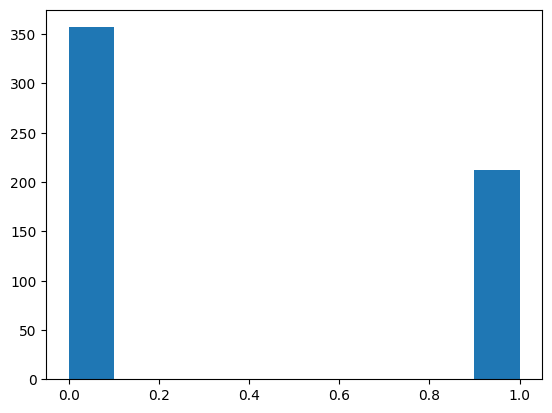

In [ ]:
plt.hist(data["diagnosis"])
plt.show()

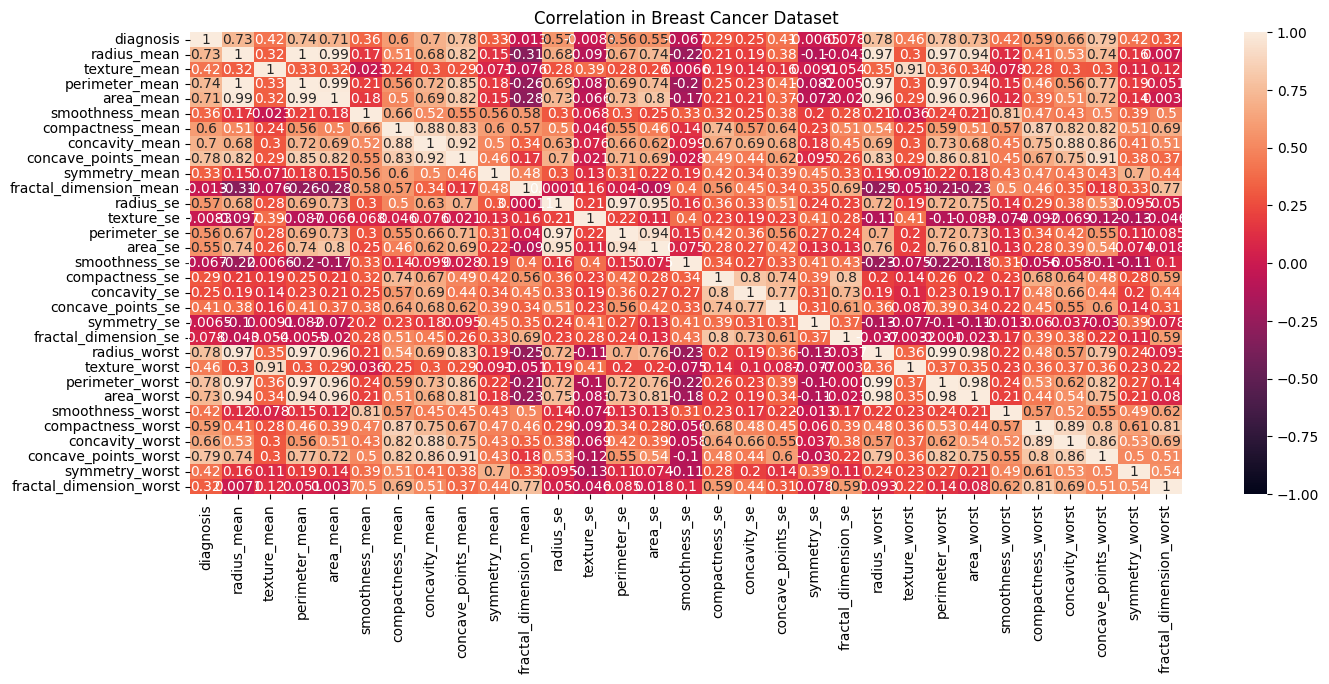

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True)
heatmap.set_title("Correlation in Breast Cancer Dataset")
plt.show()

In [ ]:

#
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
label_encoder = LabelEncoder()
min_max_scaler = MinMaxScaler()
data["diagnosis"] = label_encoder.fit_transform(data["diagnosis"])
X = data[["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave_points_mean",
          "radius_worst", "perimeter_worst", "area_worst", "concave_points_worst"]].values
X = min_max_scaler.fit_transform(X)
y = data["diagnosis"].values


#0 is Benign, 1 is Malignant


(569, 9)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape


(114,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(9,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])



In [ ]:
epochs_hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)



Epoch 1/100
15/15 [==============================] - 2s 26ms/step - loss: 0.6611 - accuracy: 0.8066 - val_loss: 0.6261 - val_accuracy: 0.8509
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5873 - accuracy: 0.8681 - val_loss: 0.5432 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4976 - accuracy: 0.9165 - val_loss: 0.4430 - val_accuracy: 0.9298
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3855 - accuracy: 0.9341 - val_loss: 0.3344 - val_accuracy: 0.9298
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2864 - accuracy: 0.9385 - val_loss: 0.2494 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2210 - accuracy: 0.9407 - val_loss: 0.1917 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1854 - accuracy: 0.9451 - val_loss: 0.1698 - val_accuracy: 0.9386
Epoch 8/100


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

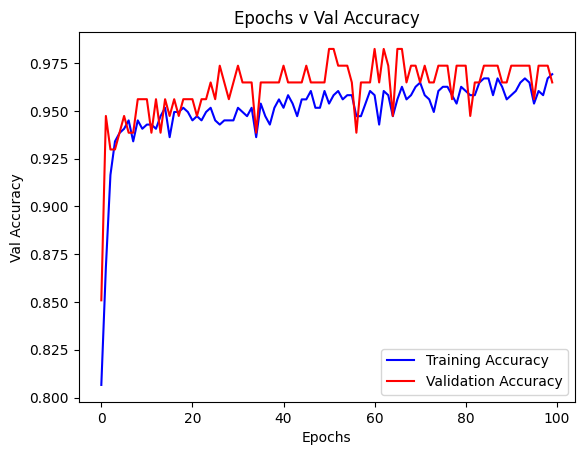

In [ ]:
plt.plot(epochs_hist.history["accuracy"], 'blue', label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs v Accuracy")
plt.plot(epochs_hist.history["val_accuracy"], 'red', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.title("Epochs v Val Accuracy")
plt.legend()
plt.show()

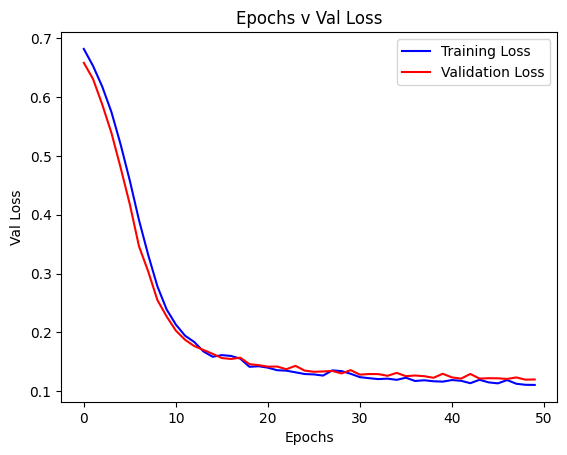

In [ ]:
plt.plot(epochs_hist.history["loss"], 'blue', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs v Loss")
plt.plot(epochs_hist.history["val_loss"], 'red', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Val Loss")
plt.title("Epochs v Val Loss")
plt.legend()
plt.show()